# Mini Hadron Collider

### Twiss and Survey

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import gc
import sys


# xsuite
import xtrack as xt
import xmask as xm
import xfields as xf
import xpart as xp





# Importing Collider, Twiss and Survey
#-------------------------------------
collider = xt.Multiline.from_json('MiniHC/JSON/MiniHC.json')

twiss = {}
twiss['lhcb1'] = collider['lhcb1'].twiss(method='4d').to_pandas(index='name')
twiss['lhcb2'] = collider['lhcb2'].twiss(method='4d').reverse().to_pandas(index='name')

survey = {}
survey['lhcb1'] = collider['lhcb1'].survey().to_pandas(index='name')
survey['lhcb2'] = collider['lhcb2'].survey().reverse().to_pandas(index='name')
#-------------------------------------


Done loading line from dict.           
Done loading line from dict.           
Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.


---
# Plotting
---

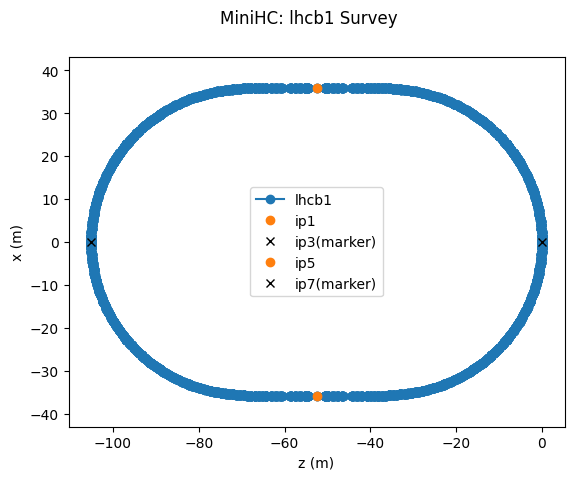

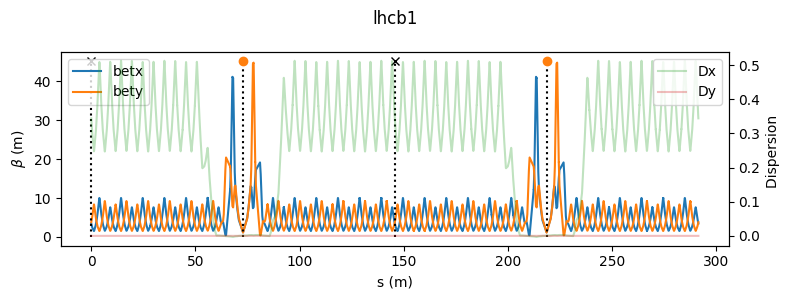

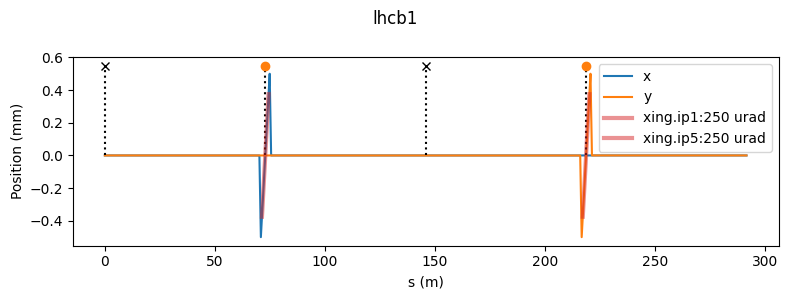

In [9]:

for seq in ['lhcb1']:

    plt.figure()
    plt.suptitle('MiniHC: lhcb1 Survey')

    plt.plot(survey[seq]['X'],survey[seq]['Z'],'-o',label=seq)
    for _IP in ['ip1','ip3','ip5','ip7']:
        if _IP in 'ip1 | ip5':
            plt.plot(survey[seq].loc[_IP,'X'],survey[seq].loc[_IP,'Z'],'o',color='C1',label=_IP )
        else:
            plt.plot(survey[seq].loc[_IP,'X'],survey[seq].loc[_IP,'Z'],'x',color='k',label=_IP + '(marker)')
    plt.legend()
    plt.axis('equal')
    plt.xlabel('z (m)')
    plt.ylabel(r'x (m)')



    plt.figure(figsize=(8,3))
    plt.suptitle(seq)
    plt.plot(twiss[seq]['s'],twiss[seq]['betx'],label='betx')
    plt.plot(twiss[seq]['s'],twiss[seq]['bety'],label='bety')
    for _IP in ['ip1','ip3','ip5','ip7']:
        if _IP in 'ip1 | ip5':
            plt.stem(twiss[seq].loc[_IP,'s'],1.1*np.max(twiss[seq]['betx']),markerfmt='C1o',linefmt='k:')
        else:
            plt.stem(twiss[seq].loc[_IP,'s'],1.1*np.max(twiss[seq]['betx']),markerfmt='kx',linefmt='k:')


    plt.legend(loc='upper left')
    plt.xlabel('s (m)')
    plt.ylabel(r'$\beta$ (m)')

    ax2 = plt.gca().twinx()
    plt.sca(ax2)
    plt.plot(twiss[seq]['s'],twiss[seq]['dx'],alpha=0.3,color='C2',label='Dx')
    plt.plot(twiss[seq]['s'],twiss[seq]['dy'],alpha=0.3,color='C3',label='Dy')
    plt.legend(loc='upper right')
    plt.ylabel(r'Dispersion ')
    plt.tight_layout()




    plt.figure(figsize=(8,3))
    plt.suptitle(seq)
    plt.plot(twiss[seq]['s'],twiss[seq]['x']/1e-3,label='x')
    plt.plot(twiss[seq]['s'],twiss[seq]['y']/1e-3,label='y')
    for _IP in ['ip1','ip3','ip5','ip7']:
        if _IP in 'ip1 | ip5':
            plt.stem(twiss[seq].loc[_IP,'s'],1.1*np.max(twiss[seq]['x']/1e-3),markerfmt='C1o',linefmt='k:')
        else:
            plt.stem(twiss[seq].loc[_IP,'s'],1.1*np.max(twiss[seq]['x']/1e-3),markerfmt='kx',linefmt='k:')
    for _IP in ['ip1','ip5']:
        xing = {'ip1': 250e-6, 'ip5': 250e-6}[_IP]
        angle_x = twiss[seq].loc[_IP,'s'] + np.linspace(-1.5,1.5,100)
        angle_y = np.tan(xing)*angle_x - np.tan(xing)*twiss[seq].loc[_IP,'s']
        plt.plot(angle_x,angle_y/1e-3,'-',lw=3,alpha=0.5,color='C3',label=f'xing.{_IP}:{xing/1e-6:.0f} urad')
        
    plt.legend()
    plt.xlabel('s (m)')
    plt.ylabel(r'Position (mm)')
    plt.tight_layout()


---
# Archive
---

In [2]:
mad.input('''
!use, sequence = lhcb1;
SAVE,   SEQUENCE = lhcb1,
        FILE     = "Shareables/minihcb1.seq",
        BEAM     = true;''')

True

In [2]:
mad.input('''
!use, sequence = lhcb1;
SAVE,   SEQUENCE = lhcb1,
        FILE     = "Shareables/minihcb1_bare.seq",
        BARE     = true;''')

True

In [2]:
mad.input('''
!use, sequence = lhcb1;
SAVE,   SEQUENCE = lhcb1,
        FILE     = "Shareables/minihcb1_strengths.seq",
        CSAVE    = true;''')

True